In [7]:
import numpy as ag
import matplotlib.pyplot as plt

In [8]:
ar=ag.random.randn(100)*10+60
print(ar)

[61.60836636 61.25803333 61.82575212 58.65658877 43.63903704 51.83134629
 58.42107484 71.49176365 53.43335422 68.65233125 79.45010015 69.79101315
 58.5105963  55.57007154 66.56123828 41.77198117 57.24298787 68.40649887
 48.68854398 56.7166807  54.41796124 52.4790724  57.19372752 69.37093761
 57.75812642 62.76596349 54.72997998 58.39547243 67.95796988 72.38571662
 67.02852548 67.89277182 48.23082978 60.89399714 63.04910162 65.91431832
 69.56136179 56.69854585 47.40405158 48.70868102 56.20867332 69.21922219
 41.81467263 55.01827377 62.97247281 58.38092853 82.53750615 68.1669039
 71.51645573 60.62169329 69.62222696 61.77321547 57.20745303 59.17945103
 62.83900162 50.23633668 61.26267211 75.02927927 55.59174537 69.17839102
 53.11563217 56.92841399 58.50713482 52.5829702  49.53458859 75.33672237
 72.50230784 62.334894   59.647028   56.46891801 62.8435846  68.08176267
 50.93996454 51.08988318 63.36328109 52.53357697 57.1397316  48.70205084
 66.08250761 53.00961114 55.90349478 83.46273101 66.

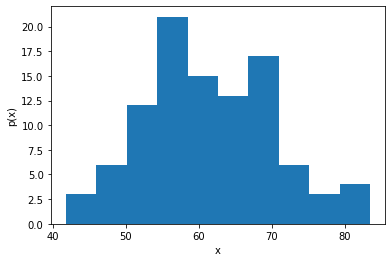

In [9]:
plt.hist(ar,bins=10)

plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()


In [10]:
ag.mean(ar)


61.26653331852575

In [11]:
ag.std(ar)

8.76788318497063

In [12]:
arr=ag.random.randint(50,70,1000)

In [13]:
ag.mean(arr)

59.605

In [14]:
apple=ag.random.multivariate_normal(mean=[5,7],cov=[[1,0.5],[.5,1.2]],size=1000)

In [15]:

print(apple)

[[4.49774798 5.81444265]
 [4.51647593 6.40799936]
 [4.2127585  5.90925493]
 ...
 [5.82754758 6.63844527]
 [3.99241691 5.43863099]
 [3.95297211 5.19454354]]


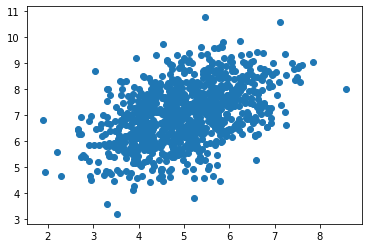

In [16]:
plt.scatter(apple[:,0],apple[:,1])
plt.show()

In [17]:
orange=ag.random.multivariate_normal(mean=[10,12],cov=[[2,-0.5],[-0.5,1]],size=600)

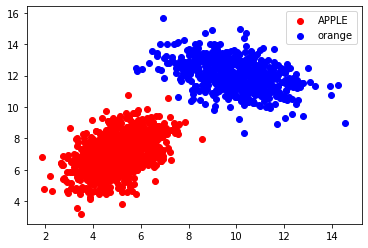

In [18]:
plt.scatter(apple[:,0],apple[:,1],color="red",label="APPLE")
plt.scatter(orange[:,0],orange[:,1],color="blue",label="orange")
plt.legend()
plt.show()


# data preparation

In [19]:
total=apple.shape[0]+orange.shape[0]
print(total)

1600


In [20]:
x=ag.zeros((total,3))
x.shape

(1600, 3)

In [21]:
x[:1000,:-1]=apple
x[1000:,:-1]=orange
x[1000:,-1]=1
print(x)

[[ 4.49774798  5.81444265  0.        ]
 [ 4.51647593  6.40799936  0.        ]
 [ 4.2127585   5.90925493  0.        ]
 ...
 [11.34056517 12.11675406  1.        ]
 [10.63171073 13.59146519  1.        ]
 [10.31968621 11.73330381  1.        ]]


In [22]:
x_values=x[:,:-1]
y_values=x[:,-1]


In [39]:
print(x_values.shape)
print(y_values)

(1600, 2)
[0. 0. 0. ... 1. 1. 1.]


In [24]:
import matplotlib.pyplot as plt


In [25]:
test_fruit=ag.array([7,11])

TypeError: scatter() missing 1 required positional argument: 'y'

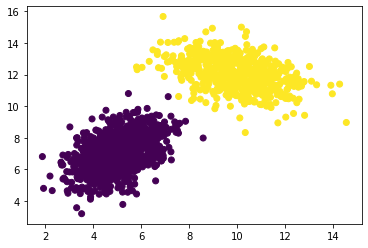

In [26]:
plt.scatter(x_values[:,0],x_values[:,1],c=y_values)
plt.scatter(test_fruit)
plt.show()

In [37]:
def knn(x,y,test,k=5):
    m=x.shape[0]
    d=[]
    for i in range(m):
        dist =distance(test,x[i])
        d.append((dist,y[i]))
       

    d=ag.array(sorted(d))[:,1]
    print(d)
    d=d[:k]
    t=ag.unique(d,return_counts=True)
    idx=ag.argmax(t[1])
    pred=int(t[0][idx])

    if pred==0:
        return "apple"
    else:
        return "orange"

In [38]:
knn(x_values,y_values,test=ag.array([7,11]))

[0. 1. 1. ... 0. 0. 0.]


'orange'

In [31]:
def distance(p1,p2):
    return ag.sum((p2-p1)**2)**.5